# HW 3 Programming Part

In [1]:
import numpy as np
import pandas as pd
from numpy import random as rnd
import matplotlib.pyplot as plt
from sklearn.metrics import auc, mean_squared_error, r2_score, f1_score,\
precision_score, recall_score, precision_recall_curve, plot_precision_recall_curve,\
roc_curve, RocCurveDisplay, plot_roc_curve
from sklearn import svm
from sklearn.svm import LinearSVC

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn import preprocessing


## Problem 1

Read in the dataset stored in 'HW3P1.txt'. The first two columns represent two features, and the last column is the labels (0 and 1).

(a) Plot the training data, each class with a different color and marker.

(b) Build two linear SVM classifiers, one with $C=1$ and one with $C=100$. Plot the decision boundary for each case along with the training data.

(c) Interpretate what leads to the different behavior of the two models (and thus the decision boundaries).

In [ ]:
class HW3_Problem:

    def __init__(self, file_name):
        self.df = np.loadtxt(file_name, delimiter=' ')
        
    def plot_df(self, model_1 = False, model_2 = False):
        '''(a) Plot the training data, each class with a different color and marker.'''
        plt.figure(figsize=(5.5, 5.5), dpi=100, facecolor='w', edgecolor='k')
        zeros = self.df[:, 2] == 0
        ones = self.df[:, 2] == 1
        plt.scatter(self.df[zeros, 0], self.df[zeros, 1],\
                    c = 'tab:red', marker = 'X', label = 'Class_0', alpha=0.6)
        plt.scatter(self.df[ones, 0], self.df[ones, 1],\
                    c = 'tab:green', marker = 'P', label = 'Class_1', alpha=0.6)
        
        if model_1 and model_2:
            coef_1_x0, coef_1_x1 = model_1.coef_[0,0], model_1.coef_[0,1]
            coef_1_b = model_1.intercept_[0]
            plt.plot(self.df[:,0], (-coef_1_b - self.df[:,0] * coef_1_x0) / coef_1_x1,\
                     color='b', label = 'SVC with C=1')
            
            coef_2_x0, coef_2_x1 = model_2.coef_[0,0], model_2.coef_[0,1]
            coef_2_b = model_2.intercept_[0]
            plt.plot(self.df[:,0], (-coef_2_b - self.df[:,0] * coef_2_x0) / coef_2_x1,\
                     color='black', label = 'SVC with C=100')
            
        plt.xlabel('feature 1')
        plt.ylabel('feature 2')
        plt.legend()
        plt.title('Some data from HW3P1.txt')
    
    def build_svc(self, kernel ='linear', c=1):
        model = svm.SVC(kernel=kernel, C=c)
        model.fit(self.df[:,[0,1]], self.df[:,2])
        return(model)
    
    def plot_svc_decision_boundary(self, model): # based on https://scikit-learn.org/stable/auto_examples/svm/plot_svm_nonlinear.html#sphx-glr-auto-examples-svm-plot-svm-nonlinear-py
        plt.figure(figsize=(5.5, 5.5), dpi=100, facecolor='w', edgecolor='k')
        #xx, yy = np.meshgrid(np.linspace(0, 1.05, 500), np.linspace(0.35, 1.05, 500))
        xx, yy = np.meshgrid(np.linspace(self.df[:,0].min()*.8, self.df[:,0].max()*1.05, 700), 
                             np.linspace(self.df[:,1].min()*.8, self.df[:,1].max()*1.05, 700))

        Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.imshow(Z, interpolation='nearest', 
                   extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
                   origin='lower', cmap=plt.cm.RdYlGn)
        contours = plt.contour(xx, yy, Z, levels=[0], linewidths=1, linestyles='dashed')
        plt.scatter(self.df[:, 0], self.df[:, 1], s=25, c=self.df[:,2], cmap=plt.cm.RdYlGn, edgecolors='k')
        
# Problem 1 parts (a) and (b)    
if __name__ == '__main__':
    %cd /Users/AM/Documents/_CU Masters/2021 spr Python ML_5027/ML_py_code/hw_data
    a = HW3_Problem('HW3P1.txt')
    a.plot_df()
    model_1 = a.build_svc(c=1)
    model_2 = a.build_svc(c=100)
    a.plot_df(model_1 = model_1, model_2 = model_2)
    #a.plot_svc_decision_boundary(model_1)


In [204]:
aa = np.array([[-1,-1,-1,1,1,1,1],[-3,-2,-1,0,1,2,3]]).transpose()
y = aa[:,0]
X = aa[:,1]
X1 = np.c_[[i/10 for i in range(-10,0, 1)]]
X = np.c_[X]
#X = X.reshape(-1,1)
model_1 = svm.SVC(kernel='linear', C = 1)
model_1.fit(X,y)
y_predicted = model_1.predict(X1)
for i in range(len(X1)):
    print(y_predicted[i], X1[i])
model_1.coef_, model_1.intercept_
#aa, X, y
#X1

-1 [-1.]
-1 [-0.9]
-1 [-0.8]
-1 [-0.7]
-1 [-0.6]
1 [-0.5]
1 [-0.4]
1 [-0.3]
1 [-0.2]
1 [-0.1]


(array([[1.]]), array([0.5]))

In [182]:
X1.shape

(20, 1)

In [24]:
a.df

array([[1.9643  , 4.5957  , 1.      ],
       [2.2753  , 3.8589  , 1.      ],
       [2.9781  , 4.5651  , 1.      ],
       [2.932   , 3.5519  , 1.      ],
       [3.5772  , 2.856   , 1.      ],
       [4.015   , 3.1937  , 1.      ],
       [3.3814  , 3.4291  , 1.      ],
       [3.9113  , 4.1761  , 1.      ],
       [2.7822  , 4.0431  , 1.      ],
       [2.5518  , 4.6162  , 1.      ],
       [3.3698  , 3.9101  , 1.      ],
       [3.1048  , 3.0709  , 1.      ],
       [1.9182  , 4.0534  , 1.      ],
       [2.2638  , 4.3706  , 1.      ],
       [2.6555  , 3.5008  , 1.      ],
       [3.1855  , 4.2888  , 1.      ],
       [3.6579  , 3.8692  , 1.      ],
       [3.9113  , 3.4291  , 1.      ],
       [3.6002  , 3.1221  , 1.      ],
       [3.0357  , 3.3165  , 1.      ],
       [1.5841  , 3.3575  , 0.      ],
       [2.0103  , 3.2039  , 0.      ],
       [1.9527  , 2.7843  , 0.      ],
       [2.2753  , 2.7127  , 0.      ],
       [2.3099  , 2.9584  , 0.      ],
       [2.8283  , 2.6309 

**(c) Interpretate what leads to the different behavior of the two models (and thus the decision boundaries).**

SVC maximizes the margin while softly penalizing points that lie on the wrong side of the margin boundary.
Parameter C controls the trade-off between the slack variable penalty and the margin.
In the limit C → ∞, we will get the hard margin support vector machine for separable data, which is highly sensitive to outliers. The black line is a good example of this behaviour (no outliers, but small margin), while the blue line demonstrates some tolerance to outliers which let it maintain larger margin

## Problem 2

Read in the dataset stored in 'HW3P2.txt'. The first two columns represent two features, and the last column is the labels (0 and 1).

(a) Plot the training data, each class with a different color and marker. Is the dataset linearly separable?

(b) Train a SVM using the RBF kernel. Adjust the parameter C to learn a decision boundary that performs well. Plot the decsion boundary.

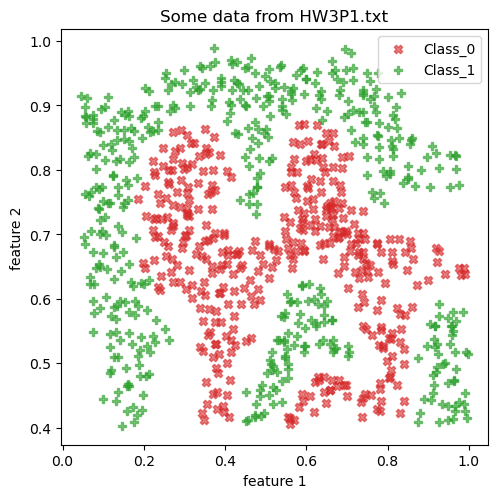

In [273]:
# Problem 2 part (a)
b = HW3_Problem('HW3P2.txt')
b.plot_df()

**The data are NOT linearly separable**

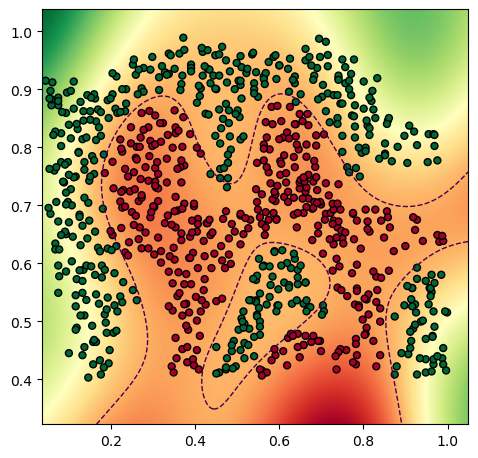

In [274]:
# Problem 2 part (b)
model_rbf = b.build_svc(kernel = 'rbf', c = 1500)
b.plot_svc_decision_boundary(model_rbf)

After C=12000 there is no visible increase in the model perfromance for the trainig set. Signs of overfitting appeared after C=1000

## Problem 3

We will investigate the wine quality problem. The data are stored in 'winequality-red.csv'. The description of the data can be found at https://archive.ics.uci.edu/ml/datasets/wine+quality. The last column of the data is the wine quality (0-10), and the other columns are features. Suppose we are intetered in classifying if the wine is good (quality greater than 5) or bad (quality less than or equal to 5). 

(a) Prepare the data. Get the feature matrix, target vector (good wines are labled 1, and 0 for bad wines). Also note that the data are separated by ";". Split the data into training and testing parts using train_test_split (). Set the parameters so that $20\%$ of the data are used as test data. Also set the random_state to 30, so that everyone gets the same splitting.

(b) Build a logistic regression model for your training data. Use all default parameters, except setting solver to 'liblinear'. Also scale the data before building the model. Report the precision, recall and F1 for the testing data.

(c) Repeat Part (b) with a support vector classifier (remember to scale data before training too). Use all default parameters.

(d) Draw the ROC curves for both models from (b) and (c) on the same plot. Find the AUCs for both models too. Does one seem better than the other?

In [275]:
ar = pd.read_csv('winequality-red.csv', sep=';')
ar['target'] = (ar['quality'] > 5).astype(int)
ar.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [276]:
ar = ar.to_numpy()
ar


array([[ 7.4  ,  0.7  ,  0.   , ...,  9.4  ,  5.   ,  0.   ],
       [ 7.8  ,  0.88 ,  0.   , ...,  9.8  ,  5.   ,  0.   ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  9.8  ,  5.   ,  0.   ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ..., 11.   ,  6.   ,  1.   ],
       [ 5.9  ,  0.645,  0.12 , ..., 10.2  ,  5.   ,  0.   ],
       [ 6.   ,  0.31 ,  0.47 , ..., 11.   ,  6.   ,  1.   ]])

In [277]:
X_train, X_test, y_train, y_test = train_test_split(ar[:,:11], ar[:,12], test_size=0.20, random_state=30)
(X_test.shape, X_train.shape, y_test.shape, y_train.shape)


((320, 11), (1279, 11), (320,), (1279,))

In [278]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [279]:
model_logistic = LogisticRegression(solver='liblinear')
model_logistic.fit(X_train_scaled, y_train)
y_test_predict = model_logistic.predict(X_test_scaled)
print('for the test data set and logistic model\n')
print(f'precision_score: {precision_score(y_test, y_test_predict):.4f}')
print(f'recall_score: {recall_score(y_test, y_test_predict):.4f}')
print(f'f1_score: {f1_score(y_test, y_test_predict):.12f}')


for the test data set and logistic model

precision_score: 0.7654
recall_score: 0.8059
f1_score: 0.785100286533


In [285]:
model_svm = LinearSVC(max_iter = 10000)
#model_svm = svm.SVC(kernel='linear')
model_svm.fit(X_train_scaled, y_train)
y_test_predict = model_svm.predict(X_test_scaled)
print('for the test data set and LinearSVC model\n')
print(f'precision_score: {precision_score(y_test, y_test_predict):.4f}')
print(f'recall_score: {recall_score(y_test, y_test_predict):.4f}')
print(f'f1_score: {f1_score(y_test, y_test_predict):.12f}')


for the test data set and LinearSVC model

precision_score: 0.7727
recall_score: 0.8000
f1_score: 0.786127167630


**interesting, but LinearSVC performs better then svm.SVC**

f1_score: 0.786127167630 vs.  f1_score: 0.771929824561



AUC for logistic model: 0.83517647
AUC for svm model: 0.83533333


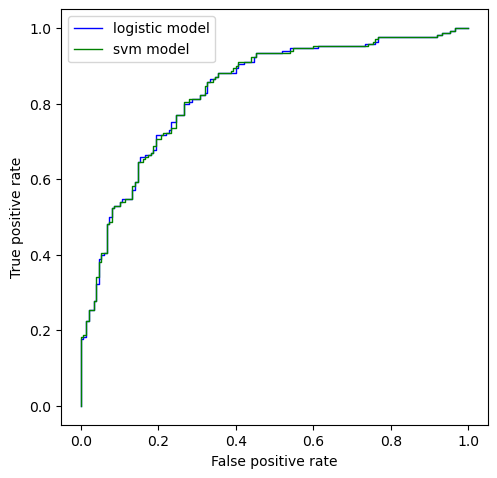

In [281]:
def ROC_and_AUC(model, model_name, color):
    y_test_score = model.decision_function(X_test_scaled) 
    fpr, tpr, thresholds = roc_curve(y_test, y_test_score)
    plt.plot(fpr, tpr, linewidth = 1, label = model_name, color = color)
    roc_auc = auc(fpr, tpr)
    print(f'AUC for {model_name}: {roc_auc:.8f}')

plt.figure(figsize=(5.5, 5.5), dpi=100, facecolor='w', edgecolor='k')
ROC_and_AUC(model_logistic, 'logistic model', 'blue') 
ROC_and_AUC(model_svm, 'svm model', 'green')   
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()   


[[-1 -1 -1  1  1  1  1]
 [-3 -2 -1  0  1  2  3]]
[[-1 -3]
 [-1 -2]
 [-1 -1]
 [ 1  0]
 [ 1  1]
 [ 1  2]
 [ 1  3]]


/Users/AM/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC()